# Importing the Required Libraries

In [1]:
import sympy
from einsteinpy import *
from einsteinpy.symbolic import *
from einsteinpy.symbolic.predefined import *

sympy.init_printing()

## Predefined Metric 1 - Schwarzschild Metric

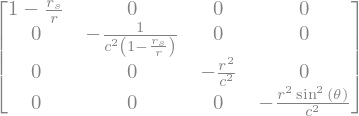

In [2]:
sch = Schwarzschild()
sch.tensor()

### Inverse of the Schwarzschild Metric

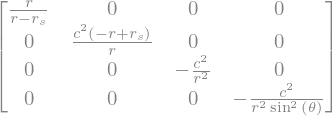

In [3]:
sch_inv = sch.inv()
sch_inv.tensor()

### Obtaining the Christoffel Symbols from the Schwarzschild Metric

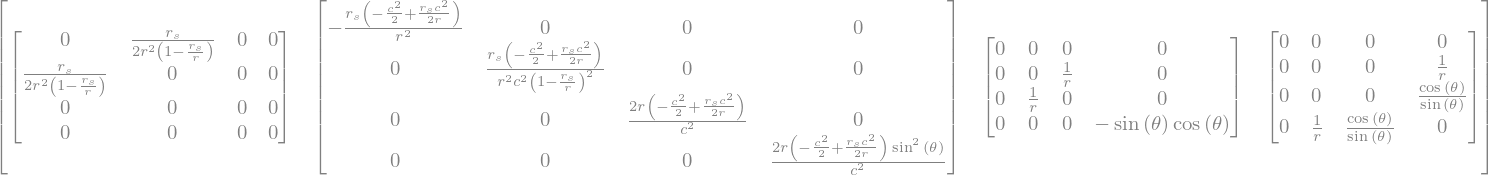

In [4]:
chr = ChristoffelSymbols.from_metric(sch)
chr.tensor()

## Predefined Metric 2 - Minkowski Metric

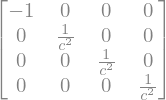

In [5]:
mks = Minkowski()
mks.tensor()
#The value of c can be set to 1 using Minkowski(c=1) while defining mks

## Predefined Metric 3 - DeSitter Metric

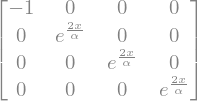

In [6]:
ds = DeSitter()
ds.tensor()

## Predefined Metric 4 - Anti DeSitter Metric

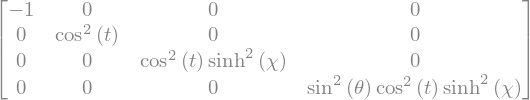

In [7]:
ads = AntiDeSitter()
ads.tensor()

## Method 1 to define own metric

M1 - Step 1 = Defining Symbols

In [8]:
syms = sympy.symbols("r theta phi")
r, theta, phi = syms

## M1 - Step 2 = Defining the elements of the metric directly as a diagonal matrix

These are then converted to a list

In [9]:
m = sympy.diag(1, r**2, r**2 * sympy.sin(theta)**2).tolist()

## M1 - Step 3 = Making the object into a Metric Tensor

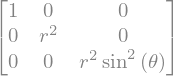

In [10]:
metric = MetricTensor(m, syms)
metric.tensor()

### Ricci Tensor from the self-defined "metric" from Method-1

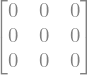

In [11]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

### Christoffel Symbols from the self-defined "metric" from Method-1

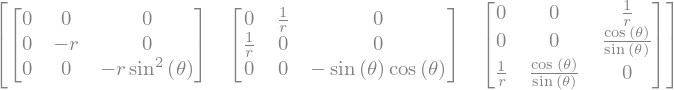

In [12]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

### Einstein Tensor from the self-defined "metric" from Method-1

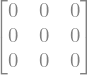

In [13]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

### A function to simply complicated-looking metric tensors called "simplify()"

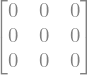

In [14]:
simplify_einst = einst.simplify()
simplify_einst

## Method 2 to define own metric

M2 - Step 1 = Defining the required symbols

In [15]:
syms = sympy.symbols("r theta phi")
r, theta, phi = syms

## M2 - Step 2 = Defining the diagonal matrix indirectly

Here, the elements can be defined separately instead of directly writing a matrix

Note that if the "range" is changed to "k", then a new metric object "my_metric[k-1][k-1]" will have to be defined

In [16]:
my_metric = [[0 for i in range(3)] for i in range(3)]
my_metric[0][0] = 1
my_metric[1][1] = r**2
my_metric[2][2] = r**2 * sympy.sin(theta)**2


## M2 - Step 3 = Making the object into a Metric Tensor

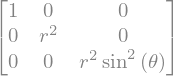

In [17]:
my_obj = MetricTensor(my_metric, syms)
my_obj.tensor()

### (A) Einstein Tensor from the self-defined "my_obj"

Note that this Einstein Tensor is the same as derived from the self-defined metric in Method-1

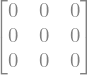

In [18]:
einst = EinsteinTensor.from_metric(my_obj)
einst.tensor()

### (B) Calculating Christoffel Symbols for "my_obj"

It can be verified that this is the same as the Christoffel Symbols derived from the self-defined metric tensor in Method-1

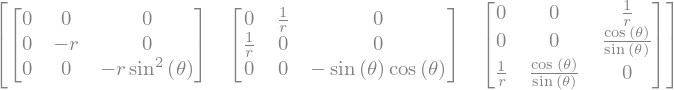

In [19]:
ch = ChristoffelSymbols.from_metric(my_obj)
ch.tensor()

### (C_i) Calculating the Riemann Curvature Tensor from Christoffel Symbol
By doing this, "my_obj" is used via the Christoffel Symbols

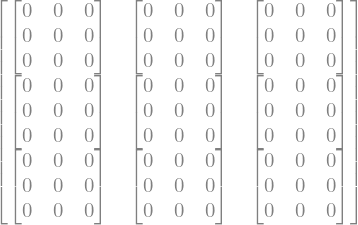

In [20]:
rm1 =  RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

### (C_ii) Calculating the Riemann Curvature Tensor from Christoffel Symbol
By doing this, "my_obj" is used directly

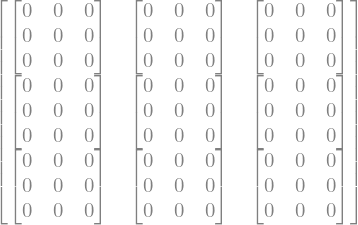

In [21]:
rm2 =  RiemannCurvatureTensor.from_metric(my_obj)
rm2.tensor()

### (D) Calculating the Weyl Tensor from "my_obj"

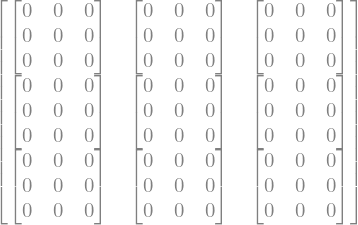

In [22]:
weyl = WeylTensor.from_metric(my_obj)
weyl.tensor()